# Homework

![Soal](Soal.jpeg "Soal")

## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%load_ext autotime
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

time: 0 ns (started: 2022-01-18 21:17:49 +07:00)


## Nomor 1

In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


time: 156 ms (started: 2022-01-18 21:17:49 +07:00)


In [3]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Karena pada movie_title terdapat white space dan menyusahkan saat melakukan analisis, maka saya melakukan penghapusan white space.  

In [4]:
# Remove white space from movie_title
df['movie_title'] = df['movie_title'].apply(lambda x: x.strip())

time: 172 ms (started: 2022-01-18 21:17:49 +07:00)


In [5]:
print('Number of duplicated data : {}'.format(df.duplicated().sum()))

Number of duplicated data : 45
time: 188 ms (started: 2022-01-18 21:17:49 +07:00)


Karena terdapat data duplikat dan mempengaruhi dari hasil analisis, maka hapus data duplikat tersebut.

In [6]:
df.drop_duplicates(inplace=True)

time: 78 ms (started: 2022-01-18 21:17:50 +07:00)


In [7]:
df['movie_title'].value_counts()

King Kong                3
Home                     3
Ben-Hur                  3
Goosebumps               2
Aloha                    2
                        ..
Me, Myself & Irene       1
The Swindle              1
Digimon: The Movie       1
A History of Violence    1
The Ides of March        1
Name: movie_title, Length: 4916, dtype: int64

time: 156 ms (started: 2022-01-18 21:17:50 +07:00)


Hapus data dengan movie lebih dari satu, karena itu akan mempengaruhi hasil analisis.

In [8]:
df.drop_duplicates(subset=['movie_title'], inplace=True)

time: 172 ms (started: 2022-01-18 21:17:50 +07:00)


### Average IMDB Score by Content Rating

In [9]:
# Average imdb score by content_rating
content_ratingscore = df[['content_rating', 'imdb_score']].groupby('content_rating', as_index=False).mean().sort_values('imdb_score', ascending=False)
# Round average imdb score
content_ratingscore['imdb_score'] = content_ratingscore['imdb_score'].apply(lambda x: round(x, 2))

time: 125 ms (started: 2022-01-18 21:17:50 +07:00)


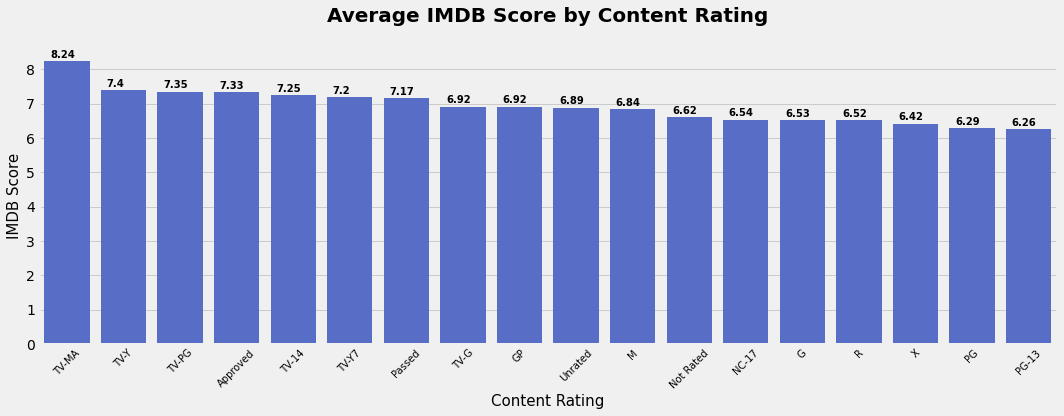

time: 875 ms (started: 2022-01-18 21:17:50 +07:00)


In [10]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=content_ratingscore, x='content_rating', y='imdb_score', ax=ax, color='#4563d9')

# Adding values to bar chart
x = np.arange(len(content_ratingscore['content_rating']))
y = content_ratingscore['imdb_score']
for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+0.1, str(v), fontsize=10, color='black', fontweight='bold')

# Additional formatting
plt.title('Average IMDB Score by Content Rating',  fontsize=20, pad=25, fontweight='bold')
plt.xlabel('Content Rating', fontsize=15)
plt.ylabel('IMDB Score', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

#### Insight
- TV-MA merupakan konten rating dengan rata-rata imdb score tertinggi, yaitu 8.24.
- Sedangkan PG-13 merupakan konten rating dengan rata-rata imdb score terendah, yaitu 6.26.

### Total Film and Duration by Director

In [11]:
df_director = df[['director_name', 'duration', 'movie_title']]
# Number of movie by director
top10_total_film = df_director.groupby('director_name', as_index=False)['movie_title'].count().sort_values('movie_title', ascending=False).head(10)
# Total duration by director
top10_total_duration = df_director.groupby('director_name', as_index=False)['duration'].sum().sort_values('duration', ascending=False).head(10)

time: 31 ms (started: 2022-01-18 21:17:51 +07:00)


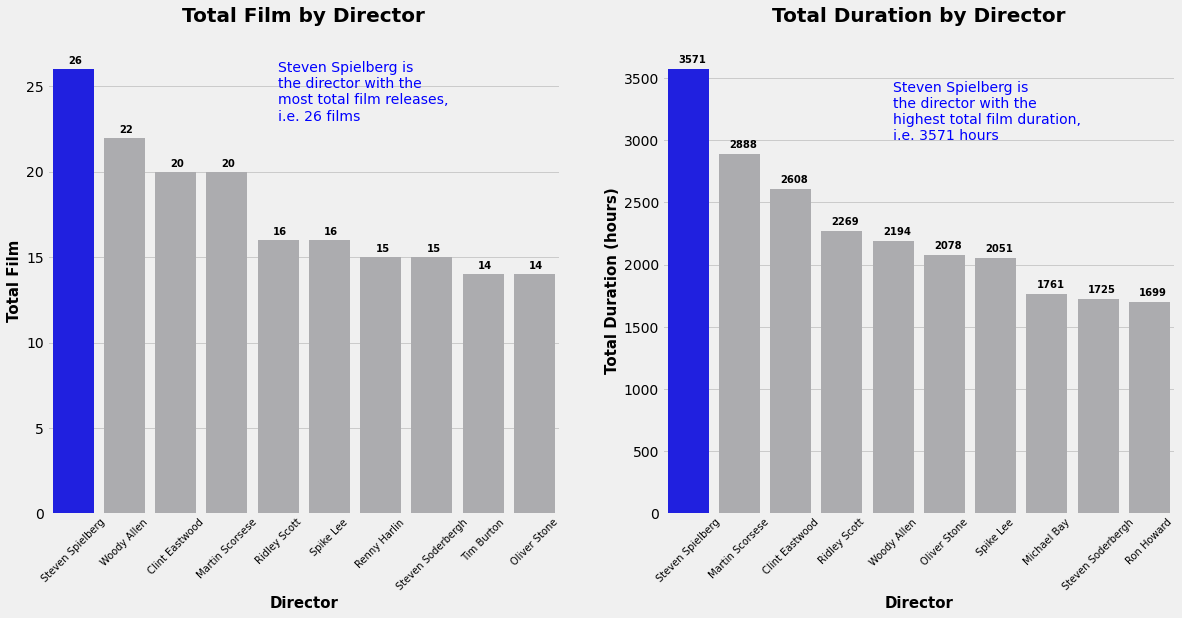

time: 1.2 s (started: 2022-01-18 21:17:51 +07:00)


In [12]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

# Conditioniing color
clrs = ['#abacb0' if (x < max(top10_total_film['movie_title'])) else 'blue' for x in  top10_total_film['movie_title']]

#  Total Film
text1 = """
Steven Spielberg is 
the director with the 
most total film releases, 
i.e. 26 films"""
# Bar chart
s = sns.barplot(data=top10_total_film, x='director_name', y='movie_title', ax=ax1, palette=clrs)
# Adding values to chart
x1 = np.arange(len(top10_total_film['director_name']))
y1 = top10_total_film['movie_title']
for i, v in enumerate(y1):
    ax1.text(x1[i]-0.1, v+0.3, str(v), fontsize=10, color='black', fontweight='bold')
    
# Additional formatting
ax1.set_title('Total Film by Director',  fontsize=20, pad=25, fontweight='bold')
ax1.set_xlabel('Director', fontsize=15, fontweight='bold')
ax1.set_ylabel('Total Film', fontsize=15, fontweight='bold')
ax1.text(4, 23, text1, color='blue')
ax1.set_xticklabels(s.get_xticklabels(), rotation=45, fontsize=10)

# Total Duration
text2 = """
Steven Spielberg is 
the director with the
highest total film duration, 
i.e. 3571 hours"""
# Bar chart
s = sns.barplot(data=top10_total_duration, x='director_name', y='duration', ax=ax2, palette=clrs)

# Adding values to chart
x2 = np.arange(len(top10_total_duration['director_name']))
y2 = top10_total_duration['duration']
for i, v in enumerate(y2):
    ax2.text(x2[i]-0.2, v+50, int(v), fontsize=10, color='black', fontweight='bold')

# Additional formatting
ax2.set_title('Total Duration by Director',  fontsize=20, pad=25, fontweight='bold')
ax2.set_xlabel('Director', fontsize=15, fontweight='bold')
ax2.set_ylabel('Total Duration (hours)', fontsize=15, fontweight='bold')
ax2.text(4, 3000, text2, color='blue')
ax2.set_xticklabels(s.get_xticklabels(), rotation=45, fontsize=10)
plt.show()

In [13]:
list(top10_total_film[top10_total_film['director_name'].isin(top10_total_duration['director_name'])]['director_name'].reset_index(drop=True))

['Steven Spielberg',
 'Woody Allen',
 'Clint Eastwood',
 'Martin Scorsese',
 'Ridley Scott',
 'Spike Lee',
 'Steven Soderbergh',
 'Oliver Stone']

time: 15 ms (started: 2022-01-18 21:17:53 +07:00)


#### Insight
Terdapat perbedaan antara kedua grafik diatas.
- Hanya 8 sutradara yang terdapat pada kedua grafik diatas, yaitu 'Steven Spielberg', 'Woody Allen', 'Clint Eastwood', 'Martin Scorsese', 'Ridley Scott', 'Spike Lee', 'Steven Soderbergh', dan 'Oliver Stone'
- Steven Spielberg merupakan sutradara dengan total film rilisan terbanyak dan total durasi terlama
- Renny Harlin, Tim Burton, Michael Bay, dan Ron Howard adalah sutradara yang hanya terdapat pada salah satu grafik diatas.

### Number of Reviews by Content Rating

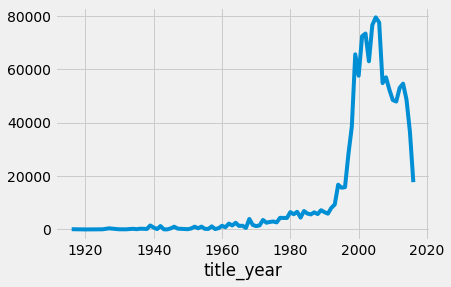

time: 328 ms (started: 2022-01-18 21:17:53 +07:00)


In [14]:
df.groupby('title_year')['num_user_for_reviews'].sum().plot(kind='line')
plt.show()

Karena ulasan dengan jumlah terbanyak yaitu setelah tahun 2000, maka saya melakukan filtering hanya untuk data yang lebih dari tahun 2000, agar memudahkan analisis dan visualisasi.

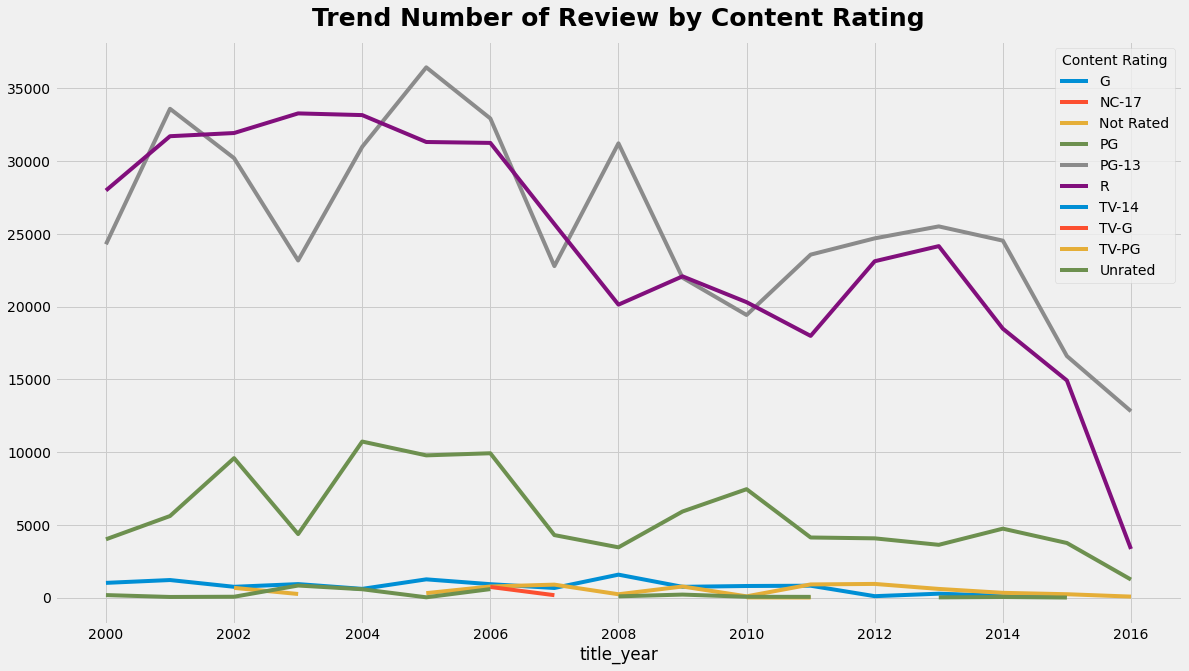

time: 672 ms (started: 2022-01-18 21:17:53 +07:00)


In [15]:
# Filtering only above 2000
df_2000 = df[df['title_year'] >= 2000][['content_rating', 'num_user_for_reviews', 'title_year']]
df_2000

# Create figure and axes
fig, ax = plt.subplots(figsize=(18, 10))
df_2000.groupby(['title_year', 'content_rating'])['num_user_for_reviews'].sum().unstack().plot(kind='line', ax=ax, label=df_2000['content_rating'])
plt.title('Trend Number of Review by Content Rating', fontsize=25, fontweight='bold', pad=15)
plt.legend(title='Content Rating')
plt.show()

#### Insight
- PG-13 dan R merupakan konten rating dengan ulasan terbanyak setiap tahunnya.
- PG-13 merupakan satu-satunya konten rating dengan jumlah ulasan lebih dari 35 ribu ulasan, yaitu terjadi tahun 2005.

### Trend Released Film by Years

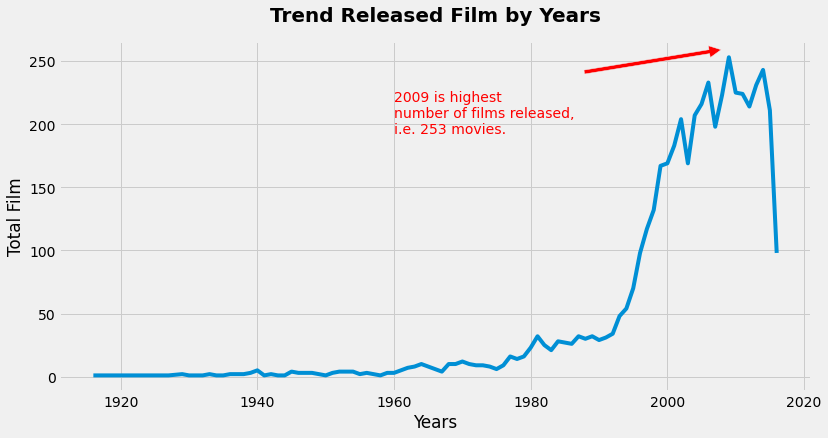

time: 375 ms (started: 2022-01-18 21:17:54 +07:00)


In [16]:
plt.figure(figsize=(12, 6))
df.groupby('title_year')['movie_title'].count().plot(kind='line')
plt.title('Trend Released Film by Years', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Years')
plt.ylabel('Total Film')

text = """
2009 is highest 
number of films released,
i.e. 253 movies.
"""

# Adding annotation
plt.annotate(text, xy=(2009, 260), xytext=(1960, 180), # text coordinates
            arrowprops=dict(connectionstyle='arc3', facecolor='red', shrink=0.05), color='red')
plt.show()

#### Insight
Tahun 2009 merupakan tahun dengan rilisan film terbanyak, yaitu 253 film.

### Highest Gross by Director

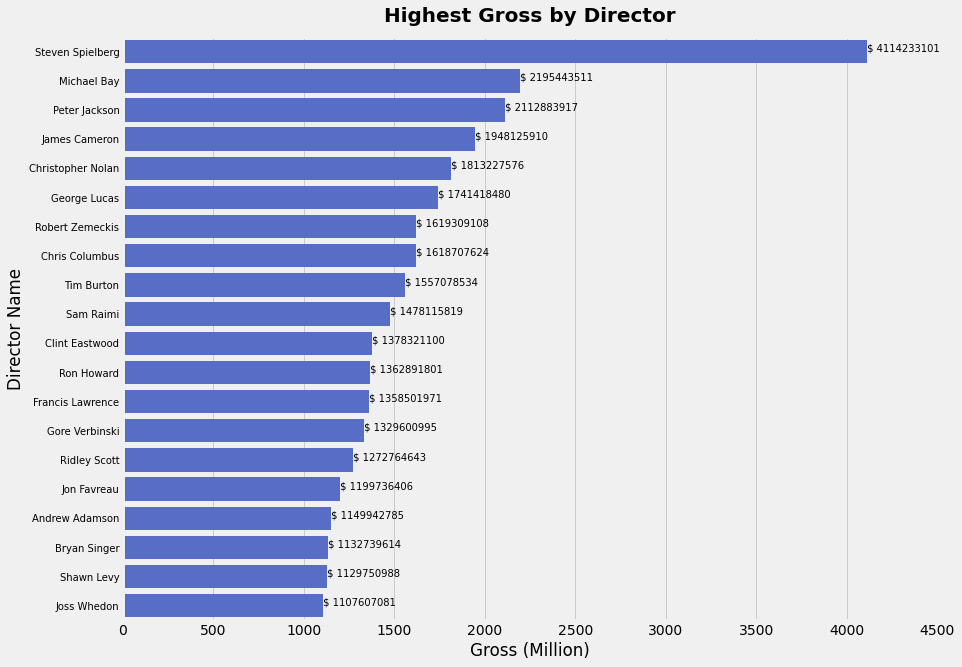

time: 1.55 s (started: 2022-01-18 21:17:54 +07:00)


In [17]:
# Total Gross by director
top20_director_gross = df.groupby('director_name', as_index=False)['gross'].sum().sort_values('gross', ascending=False).head(20)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, '$ '+ str(int(x[i])), fontsize=10)

x = list(top20_director_gross['gross'])
y = list(top20_director_gross['director_name'])

# Figure
plt.figure(figsize=(13, 10))
# Bar chart
sns.barplot(data=top20_director_gross, y='director_name', x='gross', color='#4563d9')

# Additional formatting
plt.title('Highest Gross by Director', fontsize=20, fontweight='bold', color='black', pad=15)
plt.xlabel('Gross (Million)')
plt.ylabel('Director Name')
labels, locations = plt.xticks()
plt.xticks(labels, (labels / 1000000).astype(int))
plt.xticks()
plt.yticks(fontsize=10)
addlabels(x, y)
plt.show()

#### Insight
- Steven Spielberg merupakan sutradara dengan gross terbesar yaitu mencapai lebih dari 4 miliar dolar.
- Michael Bay dan Peter Jackson adalah sutradara selanjutnya dengan gross terbesar, yaitu mencapai lebih dari 2 miliar dolar.

## Nomor 2

### Top 5 Gross by Movie 

In [18]:
# Total gross by movie
top5_movie_gross = df.groupby('movie_title', as_index=False)['gross'].sum().sort_values('gross', ascending=False).head()
# Total budget by movie
top5_movie_budget = df.groupby('movie_title', as_index=False)['budget'].sum().sort_values('budget', ascending=False).head()

time: 31 ms (started: 2022-01-18 21:17:56 +07:00)


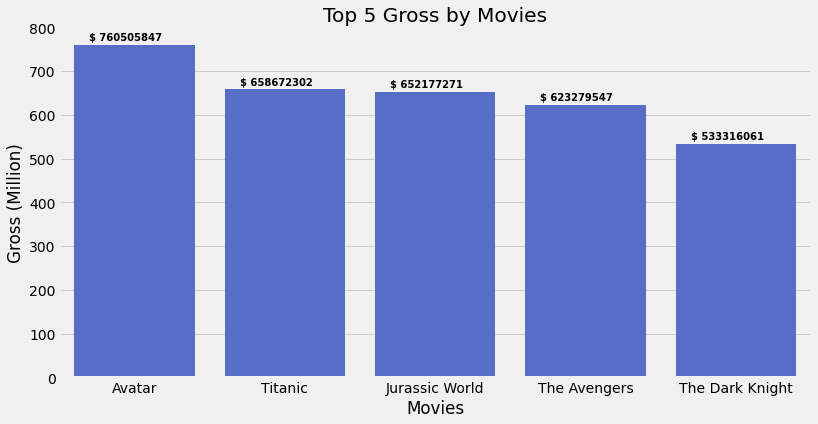

time: 453 ms (started: 2022-01-18 21:17:56 +07:00)


In [19]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart
sns.barplot(data=top5_movie_gross, x='movie_title', y='gross', color='#4563d9', ax=ax)

# Adding values to chart
x = np.arange(len(top5_movie_gross['movie_title']))
y = top5_movie_gross['gross']
for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+10000000, '$ ' + str(int(v)), fontsize=10, color='black', fontweight='bold')

# Additional formatting
plt.title('Top 5 Gross by Movies')
plt.xlabel('Movies')
plt.ylabel('Gross (Million)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000).astype(int))
plt.yticks()
plt.show()

#### Insight
- Avatar menjadi film dengan gross tertinggi, yaitu mencapai lebih dari 760 juta dolar.
- Titanic, Jurassic Wordl, The Avengers film selanjutnya dengan gross tertinggi, dengan lebih dari 600 juta dolar.
- The Dark Knight film kelima dengan gross tertinggi, yaitu mencapai lebih dari 500 juta dolar.

### Top 5 Budget by Movie 

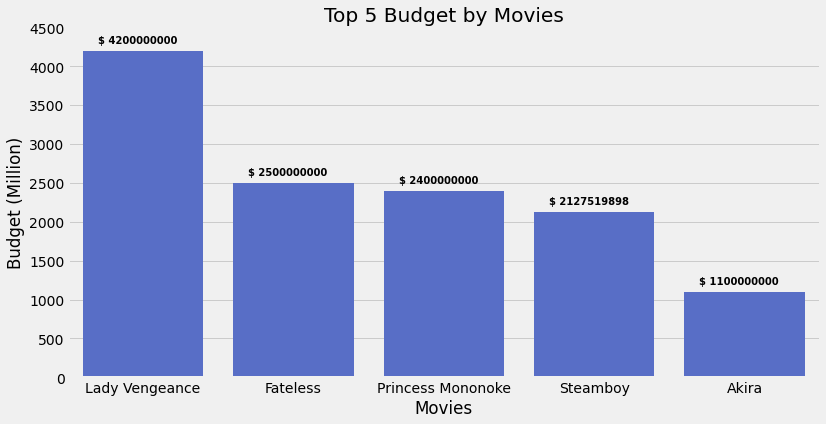

time: 641 ms (started: 2022-01-18 21:17:56 +07:00)


In [20]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bar chart
sns.barplot(data=top5_movie_budget, x='movie_title', y='budget', color='#4563d9', ax=ax)

# Adding values to chart
x = np.arange(len(top5_movie_budget['movie_title']))
y = top5_movie_budget['budget']
for i, v in enumerate(y):
    ax.text(x[i]-0.3, v+100000000, '$ ' + str(int(v)), fontsize=10, color='black', fontweight='bold')

# Additonal formatting
plt.title('Top 5 Budget by Movies')
plt.xlabel('Movies')
plt.ylabel('Budget (Million)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000).astype(int))
plt.yticks()
plt.show()

#### Insight
- Lady Vengeance yaitu film dengan budget tertinggi, yaitu mencapai 4.2 miliar dolar.
- Fateless, Princess Mononoke, Steamboy film selanjutnya dengan budget tertinggi, yaitu masing-masing lebih dari 2 miliar dolar.
- Akira yaitu film kelima dengan budget tertinggi, yaitu sekitar 1.1 miliar dolar.

### The actor with the most roles 

In [21]:
actor = df['actor_1_name'].value_counts().reset_index().head(10)
actor.columns = ['actor_name', 'cast']

time: 0 ns (started: 2022-01-18 21:17:57 +07:00)


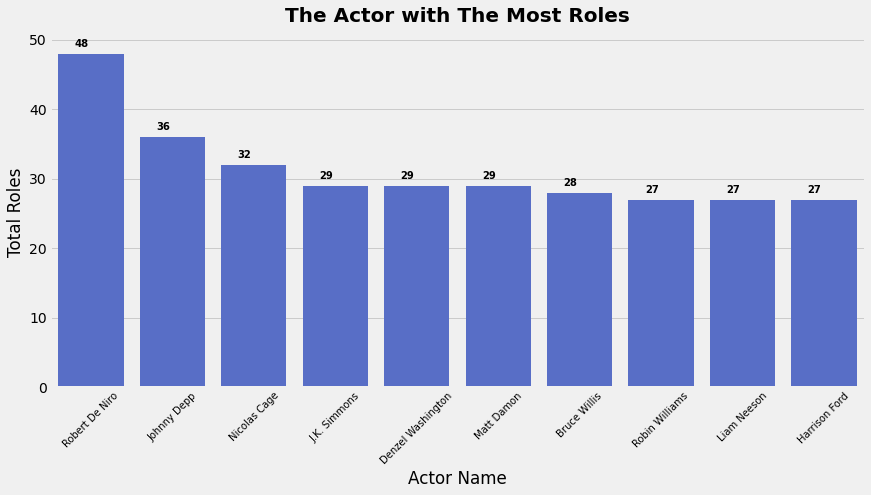

time: 453 ms (started: 2022-01-18 21:17:57 +07:00)


In [22]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=actor, x='actor_name', y='cast', color='#4563d9', ax=ax)

# Adding values to chart
x = np.arange(len(actor['actor_name']))
y = actor['cast']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+1, int(v), fontsize=10, color='black', fontweight='bold')

# Additional formatting
plt.title('The Actor with The Most Roles', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Actor Name')
plt.ylabel('Total Roles')
plt.xticks(rotation=45, fontsize=10)
plt.show()

#### Insight
- Robert De Niro yaitu aktor dengan total peran terbanyak yang pernah dijalani, yaitu mencapai 48 peran.
- Steve Buscemi yaitu aktor kesepuluh dengan peran terbanyak dengan total 27 peran. 

### IMDB Score by Movies Title


In [23]:
top10_movie_score = df.groupby('movie_title', as_index=False)['imdb_score'].mean().sort_values('imdb_score', ascending=False).head(5)
bottom10_movie_score = df.groupby('movie_title', as_index=False)['imdb_score'].mean().sort_values('imdb_score', ascending=True).head(5)

time: 31 ms (started: 2022-01-18 21:17:58 +07:00)


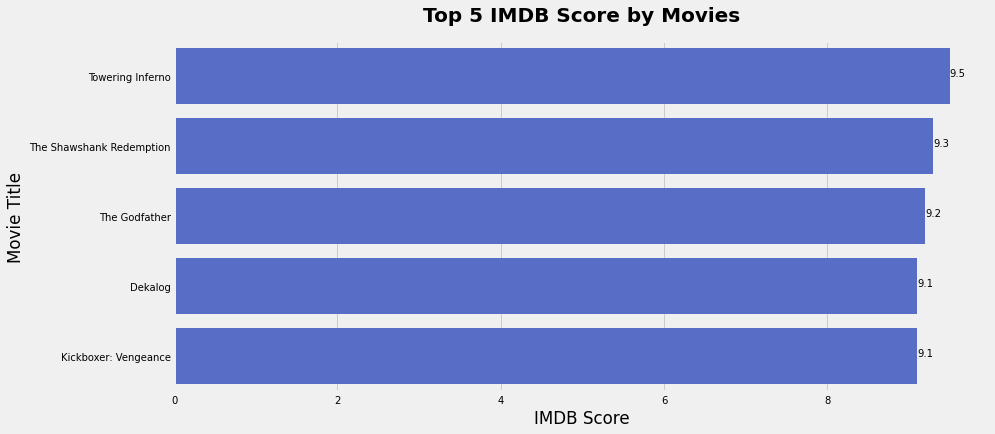

time: 328 ms (started: 2022-01-18 21:17:58 +07:00)


In [24]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i,x[i], fontsize=10)

fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=top10_movie_score, y='movie_title', x='imdb_score', ax=ax, color='#4563d9')

x = list(top10_movie_score['imdb_score'])
y = list(top10_movie_score['movie_title'])

plt.title('Top 5 IMDB Score by Movies', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('IMDB Score')
plt.ylabel('Movie Title')
addlabels(x, y)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

#### Insight
- Towering Inferno adalah film dengan skor IMDB tertinggi, yaitu mencapai 9.5.
- The Shawshank Redemption, The Godfather, Dekalog, dan Kickboxer: Vengeance merupakan film selanjutnya dengan skor IMDB tertinggi.

### The Most Movies by Country

In [25]:
country_movie_count = df['country'].value_counts().head(5)
country_movie_pct = df['country'].value_counts(normalize=True).head(5)

country_movie = pd.DataFrame({
    'country':country_movie_count.index, 
    'total':country_movie_count.values,
    'percent':country_movie_pct.values * 100
})

country_movie['percent'] = country_movie['percent'].apply(lambda x: round(x, 2))

time: 16 ms (started: 2022-01-18 21:17:58 +07:00)


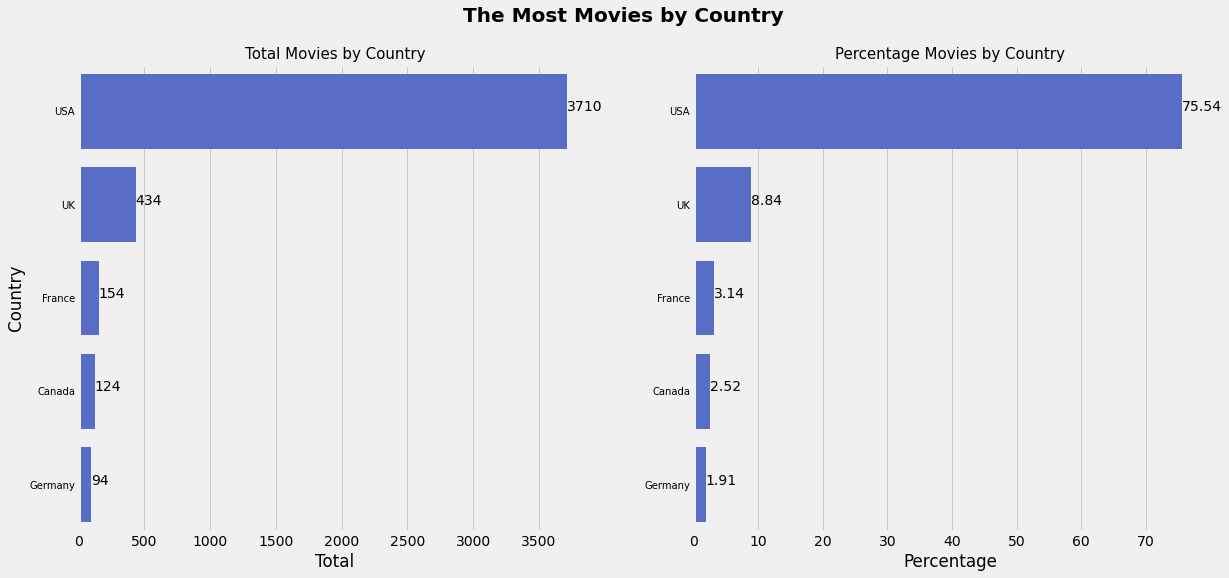

time: 797 ms (started: 2022-01-18 21:17:58 +07:00)


In [26]:
# function to add value labels
def addlabels(x,y, axes):
    for i in range(len(x)):
        axes.text(x[i],i,x[i])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('The Most Movies by Country', fontsize=20, fontweight='bold')
# Total
x1 = list(country_movie['total'])
y1 = list(country_movie['country'])

s = sns.barplot(data=country_movie, y='country', x='total', ax=ax1, color='#4563d9')
ax1.set_title('Total Movies by Country', fontsize=15)
ax1.set_xlabel('Total')
ax1.set_ylabel('Country')
ax1.set_yticklabels(s.get_yticklabels(), fontsize=10)
addlabels(x1, y1, ax1)

# Percentage from Overall
x2 = list(country_movie['percent'])
y2 = list(country_movie['country'])

s = sns.barplot(data=country_movie, y='country', x='percent', ax=ax2, color='#4563d9')
ax2.set_title('Percentage Movies by Country', fontsize=15)
ax2.set_ylabel('')
ax2.set_xlabel('Percentage')
ax2.set_yticklabels(s.get_yticklabels(), fontsize=10)
addlabels(x2, y2, ax2)
plt.show()

#### Insight
- Amerika Serikat merupakan negara dengan film rilisan terbanyak dari negara tersebut, dengan total mencapai 3710 film, yaitu 75.54% dari total keseluruhan film.
- UK, Prancis, Canada, dan Jerman negara selanjutnya dengan rilisan film terbanyak, dengan persentase masing-masing kurang dari 10% dari total keseluruhan film.

### Facebook Likes

#### Top 3 Facebook Likes by Actor

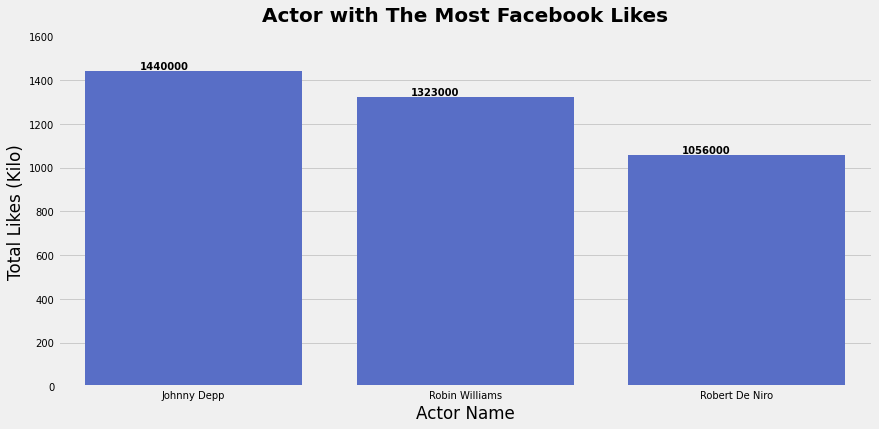

time: 406 ms (started: 2022-01-18 21:17:59 +07:00)


In [27]:
top3_actor_likes = df.groupby('actor_1_name', as_index=False)['actor_1_facebook_likes'].sum().sort_values('actor_1_facebook_likes', ascending=False).head(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=top3_actor_likes, x='actor_1_name', y='actor_1_facebook_likes', color='#4563d9', ax=ax)

# Adding values to chart
x = np.arange(len(top3_actor_likes['actor_1_name']))
y = top3_actor_likes['actor_1_facebook_likes']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+10000, int(v) , fontsize=10, color='black', fontweight='bold')

# Additional formatting
plt.title('Actor with The Most Facebook Likes', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Actor Name')
plt.ylabel('Total Likes (Kilo)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000).astype(int))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

##### Insight
- Johnny Depp merupakan aktor dengan jumlah likes facebook terbanyak, yaitu mencapai lebih dari 1.4 juta likes.
- Robin, Williams dan Robert De Niro aktor selanjutnya dengan jumlah likes facebook terbanyak, yaitu masing-masing sekitar 1.3 juta likes dan 1 juta likes. 

#### Top 3 Facebook Likes by Director

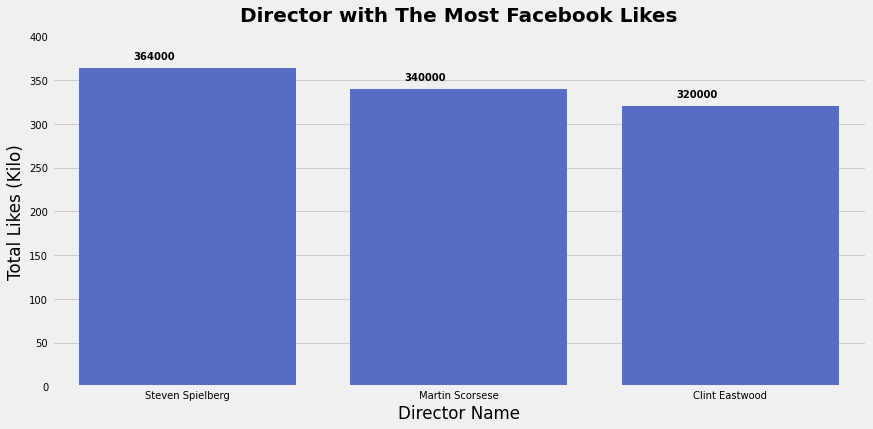

time: 360 ms (started: 2022-01-18 21:18:00 +07:00)


In [28]:
top3_director_likes = df.groupby('director_name', as_index=False)['director_facebook_likes'].sum().sort_values('director_facebook_likes', ascending=False).head(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=top3_director_likes, x='director_name', y='director_facebook_likes', color='#4563d9', ax=ax)

# Adding values to chart
x = np.arange(len(top3_director_likes['director_name']))
y = top3_director_likes['director_facebook_likes']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+10000, int(v) , fontsize=10, color='black', fontweight='bold')

# Additional formatting
plt.title('Director with The Most Facebook Likes', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Director Name')
plt.ylabel('Total Likes (Kilo)')
plt.xticks(fontsize=10)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000).astype(int))
plt.yticks(fontsize=10)
plt.show()

##### Insight
- Steven Spielberg merupakan sutradara dengan jumlah likes facebook terbanyak, yaitu mencapai lebih dari 360 ribu likes.
- Martin Scorsese, dan Clint Eastwood sutradara selanjutnya dengan jumlah likes facebook terbanyak, yaitu masing-masing sekitar 340 ribu likes dan 320 ribu likes. 

#### Top 3 Facebook Likes by Movie 

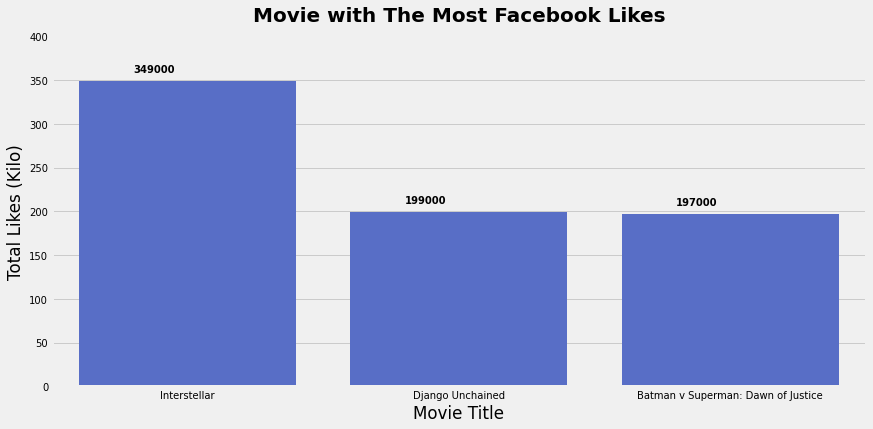

time: 391 ms (started: 2022-01-18 21:18:00 +07:00)


In [29]:
top3_movie_likes = df.groupby('movie_title', as_index=False)['movie_facebook_likes'].sum().sort_values('movie_facebook_likes', ascending=False).head(3)

# Create figure and axes
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(data=top3_movie_likes, x='movie_title', y='movie_facebook_likes', color='#4563d9', ax=ax)

# Adding values to chart
x = np.arange(len(top3_movie_likes['movie_title']))
y = top3_movie_likes['movie_facebook_likes']

for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+10000, int(v) , fontsize=10, color='black', fontweight='bold')

# Additional formatting
plt.title('Movie with The Most Facebook Likes', fontsize=20, fontweight='bold', pad=15)
plt.xlabel('Movie Title')
plt.ylabel('Total Likes (Kilo)')
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000).astype(int))
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

##### Insight
- Interstellar merupakan film dengan jumlah likes facebook terbanyak, yaitu mencapai lebih dari 340 ribu likes.
- Django Unchained, dan Batman v Superman adalah film selanjutnya dengan jumlah likes facebook terbanyak, yaitu masing-masing sekitar 199 ribu likes dan 197 ribu likes. 

### Number of Reviews

In [30]:
number_of_critic = df.groupby('movie_title', as_index=False)['num_critic_for_reviews'].sum().sort_values('num_critic_for_reviews', ascending=False).head()
number_user = df.groupby('movie_title', as_index=False)['num_user_for_reviews'].sum().sort_values('num_user_for_reviews', ascending=False).head()

time: 31 ms (started: 2022-01-18 21:18:00 +07:00)


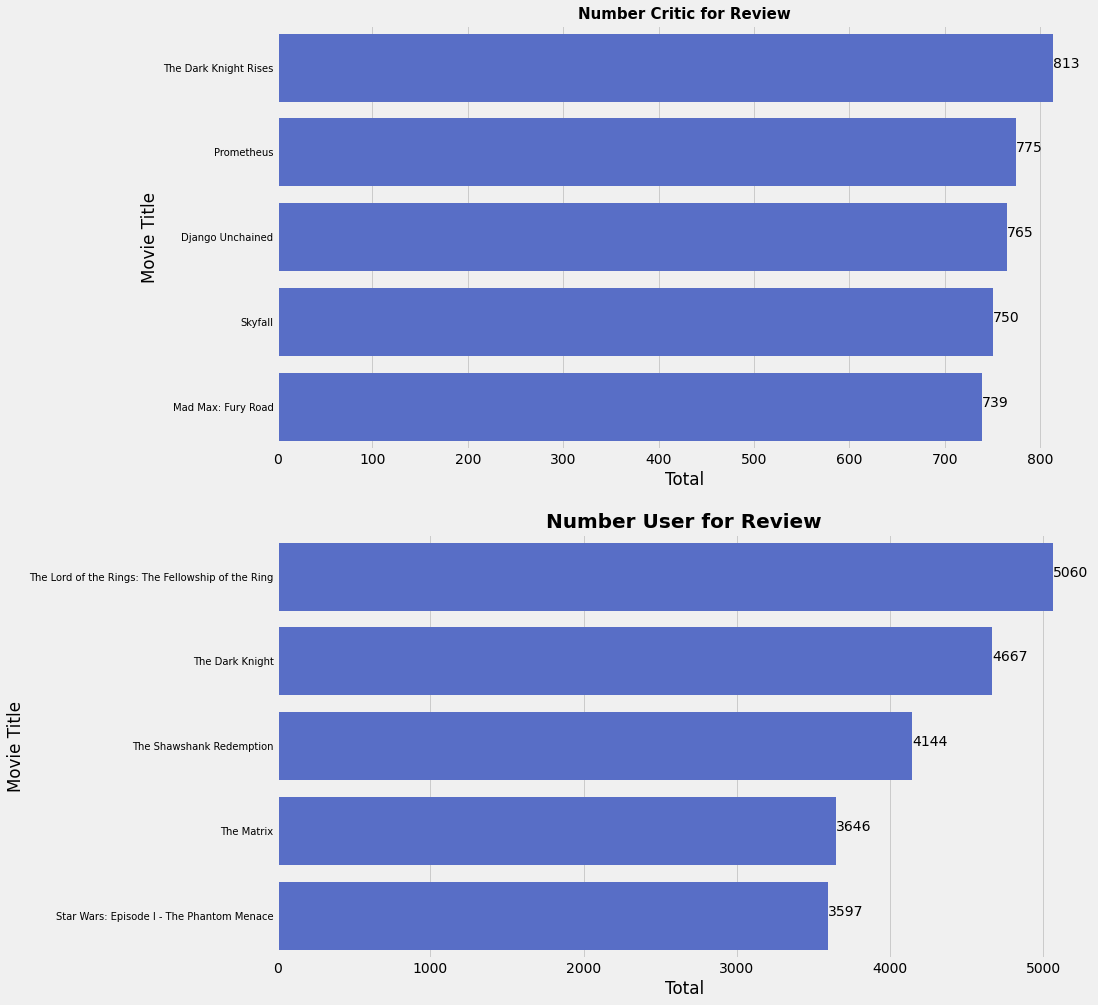

time: 1.2 s (started: 2022-01-18 21:18:00 +07:00)


In [31]:
# function to add value labels
def addlabels(x,y, axes):
    for i in range(len(x)):
        axes.text(x[i],i,int(x[i]))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 16))
# Number of Critic
x1 = list(number_of_critic['num_critic_for_reviews'])
y1 = list(number_of_critic['movie_title'])

s = sns.barplot(data=number_of_critic, y='movie_title', x='num_critic_for_reviews', ax=ax1, color='#4563d9')
ax1.set_title('Number Critic for Review', fontsize=15, fontweight='bold')
ax1.set_xlabel('Total')
ax1.set_ylabel('Movie Title')
ax1.set_yticklabels(s.get_yticklabels(), fontsize=10)
addlabels(x1, y1, ax1)

# Number User
x2 = list(number_user['num_user_for_reviews'])
y2 = list(number_user['movie_title'])

s = sns.barplot(data=number_user, y='movie_title', x='num_user_for_reviews', ax=ax2, color='#4563d9')
ax2.set_title('Number User for Review', fontsize=20, fontweight='bold')
ax2.set_ylabel('Movie Title')
ax2.set_xlabel('Total')
ax2.set_yticklabels(s.get_yticklabels(), fontsize=10)
addlabels(x2, y2, ax2)
plt.show()

#### Insight
- The Dark Knight Rises merupakan film dengan jumlah ulasan kritik terbanyak, yaitu mencapai 813 ulasan.  
- The Lord of The Rings merupakan film dengan jumlah ulasan dari pengguna terbanyak, yaitu mencapai 5060 ulasan.

In [32]:
df.to_csv('movie.csv', index=False)

time: 328 ms (started: 2022-01-18 21:18:02 +07:00)


## Dashboard Movie Analysis

Berikut merupakan link dashboard tableau yang sudah saya buat. [Click here](https://public.tableau.com/app/profile/insan.cahya.setia/viz/Homework-Data_Visualization-Insan_Cahya_Setia/DashboardMovies)